In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, SpatialDropout1D, Dense

# Sample Dataset (Text in Hindi, Malayalam, Tamil)
data = {
    'Language': ['Hindi', 'Hindi', 'Hindi', 'Hindi', 'Hindi', 'Malayalam', 'Malayalam', 'Malayalam', 'Malayalam', 'Malayalam', 
                 'Tamil', 'Tamil', 'Tamil', 'Tamil', 'Tamil'],
    'Text': ['नमस्कार क्या हालचाल हैं', 'आज तुम कब जा रहे हो', 'बैंगलोर बहुत भीड़भाड़ वाली जगह है', 'मैं चैटजीपीटी का बहुत उपयोग करता हूं', 
             'क्राइस्ट यूनिवर्सिटी बहुत तनावपूर्ण है', 'ജവഹർലാൽ നെഹ്റു ആയിരുന്നു പ്രധാനമന്ത്രി.', 'കാറുകൾക്ക് നാല് ചക്രങ്ങളുണ്ട്', 
             'നീ എപ്പോഴാണ് കോളേജില് പോയത്?', 'സത്യസന്ധമായി പറഞ്ഞാല് എനിക്കതൊന്നും പ്രശ്നമല്ല.', 'ക്രൈസ്റ്റ് യൂണിവേഴ്സിറ്റി വളരെ സമ്മർദ്ദകരമാണ്', 
             'நான் நேர்மையாக இனி கவலை இல்லை', 'இந்த வருடம் அற்புதமாக இருக்கும்', 'எனக்கு இன்னும் நான்கு வாக்கியங்கள் தேவை', 'மன்யதா டெக் பார்க் சிறந்தது', 
             'என் கனவு கார் பிஎம்டபிள்யூ']
}

df = pd.DataFrame(data)

# Check the distribution
print(df['Language'].value_counts())

# Label Encoding (Convert Languages to integers)
label_encoder = LabelEncoder()
df['Language'] = label_encoder.fit_transform(df['Language'])

# Preprocessing (Remove noise, normalization, optional stopword removal)
df['Text'] = df['Text'].str.replace(r'\d+', '')  # Remove digits
df['Text'] = df['Text'].str.replace(r'[^\w\s]', '')  # Remove punctuation

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df['Text'], df['Language'], test_size=0.2, random_state=42)

# Feature Extraction (TF-IDF, N-grams)
vectorizer = TfidfVectorizer(ngram_range=(1, 3), max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Convert to arrays for neural network
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=50)
X_test_pad = pad_sequences(X_test_seq, maxlen=50)



Language
Hindi        5
Malayalam    5
Tamil        5
Name: count, dtype: int64


Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.33      1.00      0.50         1
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1

    accuracy                           0.33         3
   macro avg       0.11      0.33      0.17         3
weighted avg       0.11      0.33      0.17         3



c:\Users\Joel\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Joel\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Joel\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


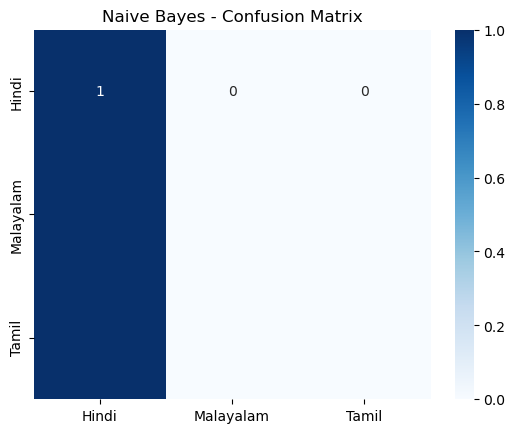

In [8]:
# Traditional Model - Naive Bayes
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_tfidf, y_train)

# Predictions and Evaluation
y_pred_nb = naive_bayes.predict(X_test_tfidf)

# Evaluation
print("Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))
cm_nb = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Naive Bayes - Confusion Matrix")
plt.show()


Epoch 1/5


c:\Users\Joel\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.2500 - loss: 1.0968 - val_accuracy: 0.3333 - val_loss: 1.0989
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.3333 - loss: 1.1042 - val_accuracy: 0.3333 - val_loss: 1.0990
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.5000 - loss: 1.0893 - val_accuracy: 0.3333 - val_loss: 1.0994
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.7500 - loss: 1.0686 - val_accuracy: 0.3333 - val_loss: 1.1001
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.9167 - loss: 1.0590 - val_accuracy: 0.3333 - val_loss: 1.1009
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
Deep Learning (LSTM) Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.33      1.00      0.50         1
           2       0.00      0.00      0.00         1

    accuracy                           0.33         3
   macro avg       0.11      0.33    

c:\Users\Joel\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Joel\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Joel\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


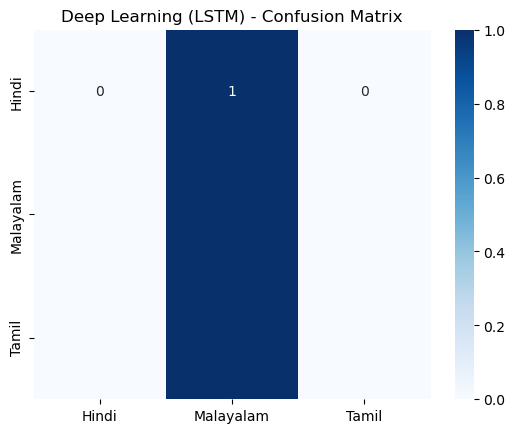

In [9]:
# Deep Learning Model - LSTM
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=50))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(3, activation='softmax'))  # Assuming three classes: Hindi, Malayalam, Tamil

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train_pad, y_train, epochs=5, batch_size=64, validation_data=(X_test_pad, y_test))

# Evaluate the model
y_pred_dl = np.argmax(model.predict(X_test_pad), axis=-1)

# Evaluation
print("Deep Learning (LSTM) Classification Report:")
print(classification_report(y_test, y_pred_dl))
cm_dl = confusion_matrix(y_test, y_pred_dl)
sns.heatmap(cm_dl, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Deep Learning (LSTM) - Confusion Matrix")
plt.show()
